## Figure 4.2 - 4.6 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf
import src.utility.gen_ts_synthetic as gen_syn
import src.utility.utility_frequency_analysis as sDFT
from scipy.fft import fft, fftfreq
from statsmodels.graphics.tsaplots import plot_acf

## Periodogram
## Figure 4.2

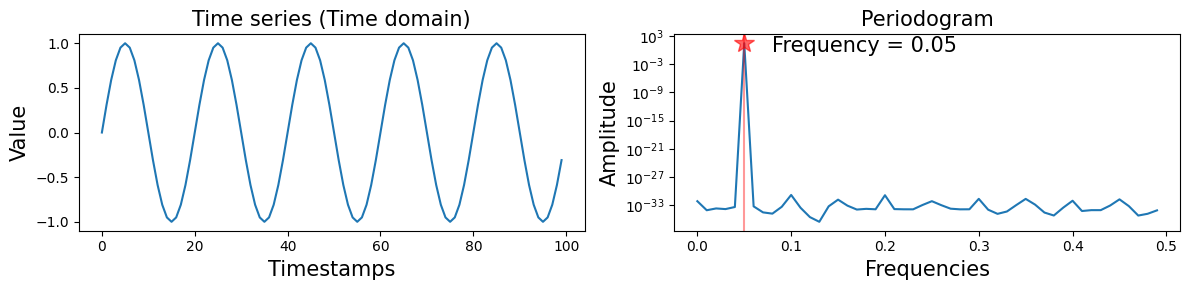

In [4]:
np.random.seed(0)
ts = np.array(gen_syn.sinewave(100,20,1))
# R_t = 0.2 * np.random.randn(len(ts))

start_fft = fft(ts)

xfreq, pden = sDFT.peridogram(len(ts),start_fft)
max_idx = np.argmax(pden)
max_idx = np.argmax(pden)


fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].plot(ts)
axs[0].set_xlabel('Timestamps', fontsize=15)
axs[0].set_ylabel('Value', fontsize=15)
axs[0].set_title('Time series (Time domain)', fontsize=15)

#
axs[1].semilogy(xfreq, pden)
axs[1].plot(xfreq[max_idx], pden[max_idx], 'r*', markersize=15, alpha = 0.6)
axs[1].axvline(x=xfreq[max_idx], color = 'red', alpha= 0.4)
axs[1].text(xfreq[max_idx] + 0.03, pden[max_idx] - 24.7, f'Frequency = {xfreq[max_idx]}', fontsize=15)
axs[1].set_title('Periodogram', fontsize=15)
axs[1].set_xlabel('Frequencies', fontsize=15)
axs[1].set_ylabel('Amplitude', fontsize=15)

plt.tight_layout()
plt.show()


## Figure 4.3

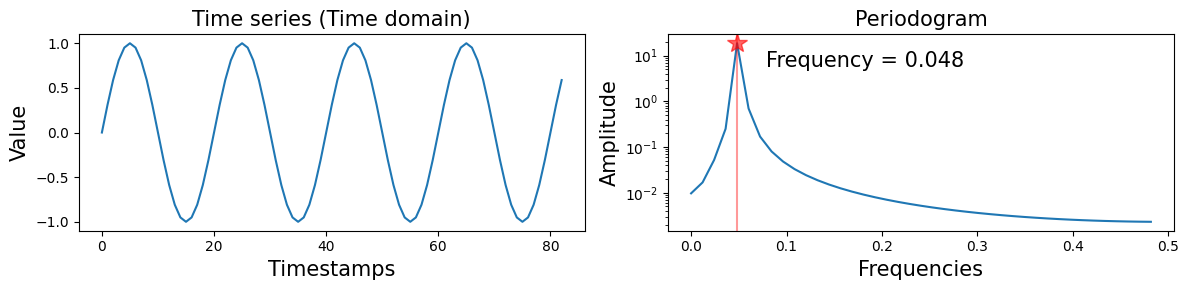

In [5]:
start_fft = fft(ts[:83])   ## window size = 83
xfreq, pden = sDFT.peridogram(len(ts[:83]),start_fft)
max_idx = np.argmax(pden)
max_idx = np.argmax(pden)


fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].plot(ts[:83])
axs[0].set_xlabel('Timestamps', fontsize=15)
axs[0].set_ylabel('Value', fontsize=15)
axs[0].set_title('Time series (Time domain)', fontsize=15)

#
axs[1].semilogy(xfreq, pden)
axs[1].plot(xfreq[max_idx], pden[max_idx], 'r*', markersize=15, alpha = 0.6)
axs[1].axvline(x=xfreq[max_idx], color = 'red', alpha= 0.4)
axs[1].text(xfreq[max_idx] + 0.03, pden[max_idx]*0.3, f'Frequency = {round(xfreq[max_idx],3)}', fontsize=15)
axs[1].set_title('Periodogram', fontsize=15)
axs[1].set_xlabel('Frequencies', fontsize=15)
axs[1].set_ylabel('Amplitude', fontsize=15)

plt.tight_layout()
plt.show()

## Auto-correlation function part (ACF)
## Figure 4.4 

15


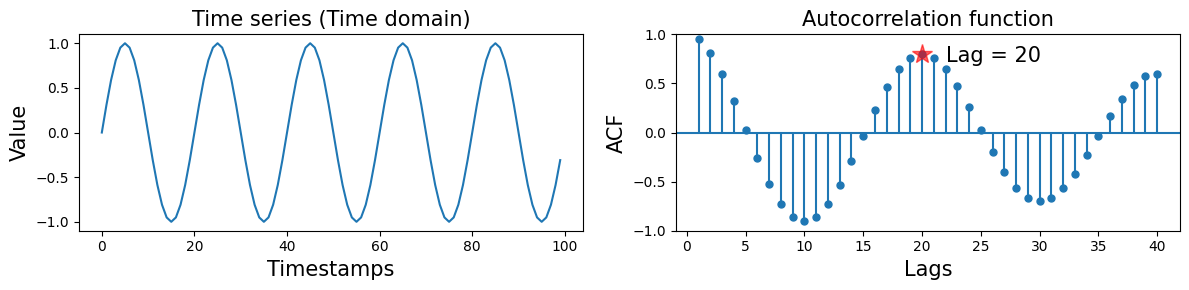

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].plot(ts)
axs[0].set_xlabel('Timestamps', fontsize=15)
axs[0].set_ylabel('Value', fontsize=15)
axs[0].set_title('Time series (Time domain)', fontsize=15)

#
plot_acf(ts, ax=axs[1], lags=40, zero =False, bartlett_confint= False, alpha=None)  # Adjust lags as needed
acf_values = acf(ts, nlags=40, fft=True)  # Adjust nlags as needed
lag_of_highest_acf = np.argmax(acf_values[5:])
print(lag_of_highest_acf)
highest_acf_value = acf_values[lag_of_highest_acf+5]
lag_of_highest_acf = np.argmax(acf_values[5:])
axs[1].plot(lag_of_highest_acf+5, highest_acf_value, 'r*', markersize=15, alpha = 0.6)
axs[1].text(lag_of_highest_acf+7, highest_acf_value*0.9, f'Lag = {lag_of_highest_acf+5}', fontsize=15)
axs[1].set_title('Autocorrelation function', fontsize=15)
axs[1].set_xlabel('Lags', fontsize=15)
axs[1].set_ylabel('ACF', fontsize=15)

plt.tight_layout()
plt.show()

## Figure 4.5 window size = 83

15


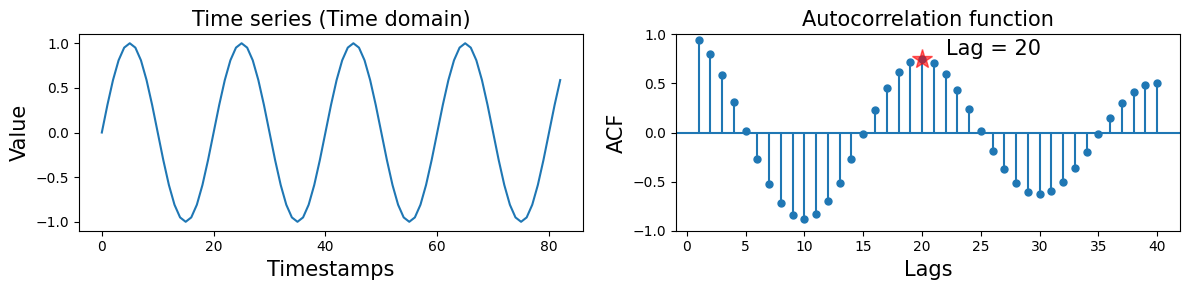

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].plot(ts[:83])
axs[0].set_xlabel('Timestamps', fontsize=15)
axs[0].set_ylabel('Value', fontsize=15)
axs[0].set_title('Time series (Time domain)', fontsize=15)

#
plot_acf(ts[:83], ax=axs[1], lags=40,zero =False, bartlett_confint= False, alpha=None)  # Adjust lags as needed
acf_values = acf(ts[:83], nlags=40, fft=True)  # Adjust nlags as needed
lag_of_highest_acf = np.argmax(acf_values[5:])
print(lag_of_highest_acf)
highest_acf_value = acf_values[lag_of_highest_acf+5]
lag_of_highest_acf = np.argmax(acf_values[5:])
axs[1].plot(lag_of_highest_acf+5, highest_acf_value, 'r*', markersize=15, alpha = 0.6)
axs[1].text(lag_of_highest_acf+7, highest_acf_value*1.05, f'Lag = {lag_of_highest_acf+5}', fontsize=15)
axs[1].set_title('Autocorrelation function', fontsize=15)
axs[1].set_xlabel('Lags', fontsize=15)
axs[1].set_ylabel('ACF', fontsize=15)

plt.tight_layout()
plt.show()

## Figure 4.6 noise

16


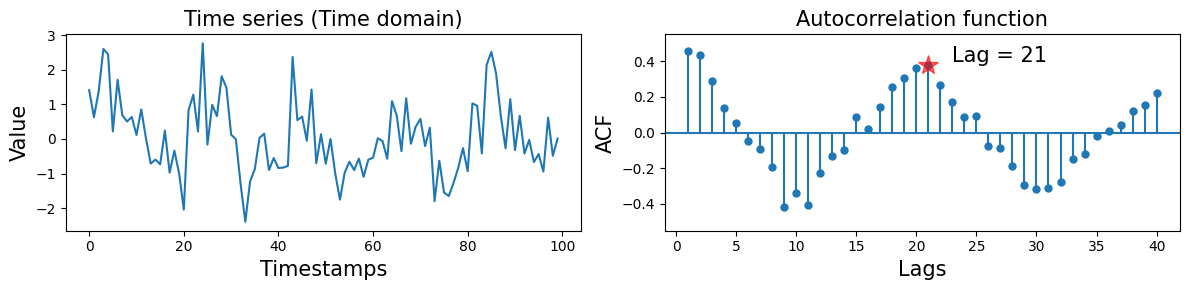

In [8]:
np.random.seed(0)
R_t = 0.8 * np.random.randn(len(ts))
ts_n = ts + R_t

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].plot(ts_n)
axs[0].set_xlabel('Timestamps', fontsize=15)
axs[0].set_ylabel('Value', fontsize=15)
axs[0].set_title('Time series (Time domain)', fontsize=15)



acf_values = acf(ts_n, nlags=40, fft=True)  # Adjust nlags as needed

# Find the lag with the highest ACF
lag_of_highest_acf = np.argmax(acf_values[5:])
print(lag_of_highest_acf)
highest_acf_value = acf_values[lag_of_highest_acf+5]

plot_acf(ts_n, ax=axs[1], lags=40, bartlett_confint= False,zero=False, alpha=None)  # Adjust lags as needed\
axs[1].set_ylim([-0.55 , 0.55])
axs[1].plot(lag_of_highest_acf+5, highest_acf_value, 'r*', markersize=15, alpha = 0.6)
# axs[1].annotate('Highest ACF', xy=(lag_of_highest_acf, highest_acf_value),
#                 xytext=(lag_of_highest_acf, highest_acf_value + 0.05),
#                 arrowprops=dict(facecolor='black', shrink=0.05),
#                 fontsize=12)
axs[1].text(lag_of_highest_acf+7, highest_acf_value*1.05, f'Lag = {lag_of_highest_acf+5}', fontsize=15)
axs[1].set_title('Autocorrelation function', fontsize=15)
axs[1].set_xlabel('Lags', fontsize=15)
axs[1].set_ylabel('ACF', fontsize=15)

plt.tight_layout()
plt.show()